In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [17]:
iris=pd.read_csv("Iris.csv") #load the dataset
print(iris.shape)
iris.head(10) #displays first 10 rows from dataset

(150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [18]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [19]:
iris.drop_duplicates(inplace=True)
iris.shape

(150, 6)

In [20]:
iris.drop('Id',axis=1,inplace=True)

In [21]:
iris.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [22]:
iris.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [23]:
fig=px.histogram(iris,
                   x='Species',
                   color='Species'
                   )

fig.update_layout(barmode="overlay",
                  bargap=0.1
                  )
fig.show()

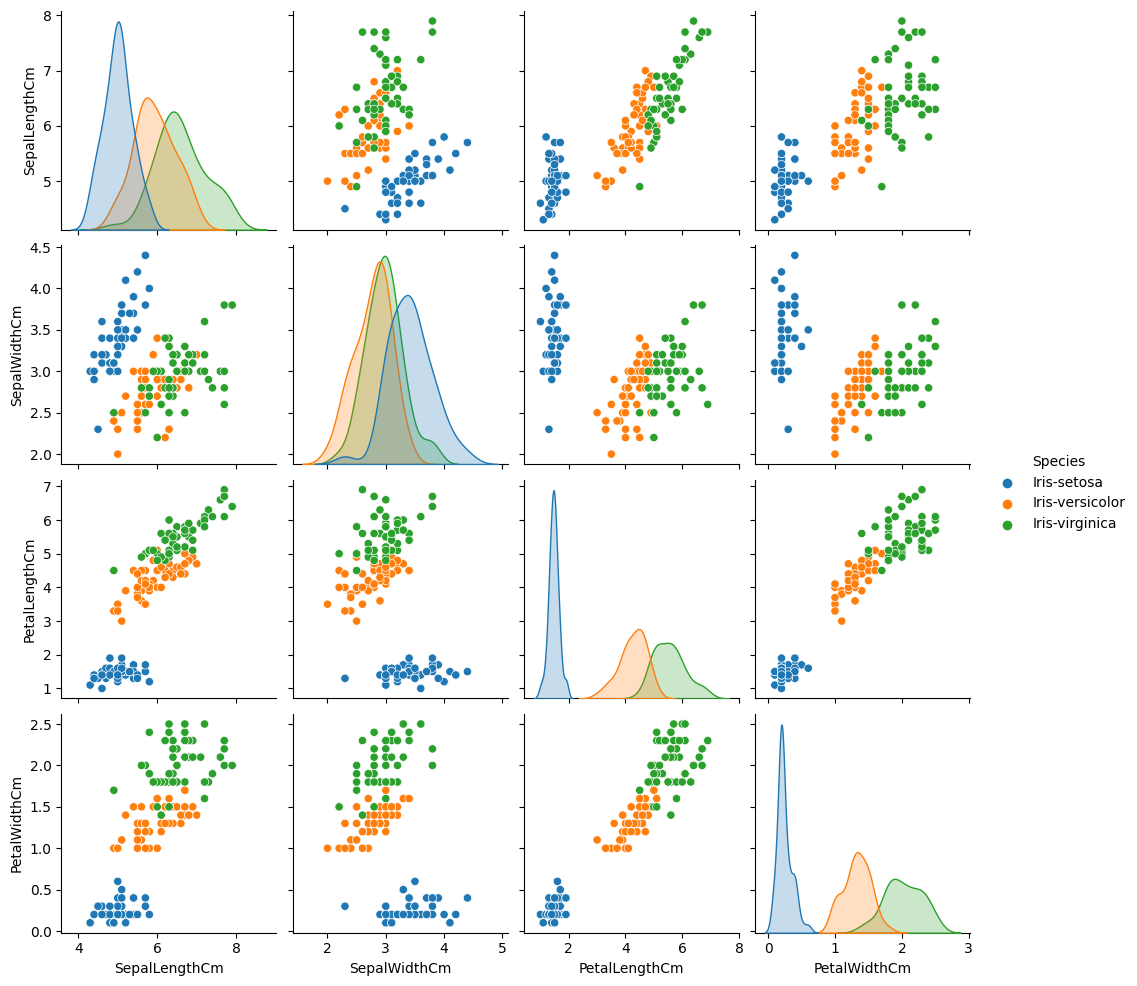

In [24]:
sns.pairplot(iris, diag_kind='kde', hue="Species")

<AxesSubplot: xlabel='Species', ylabel='SepalWidthCm'>

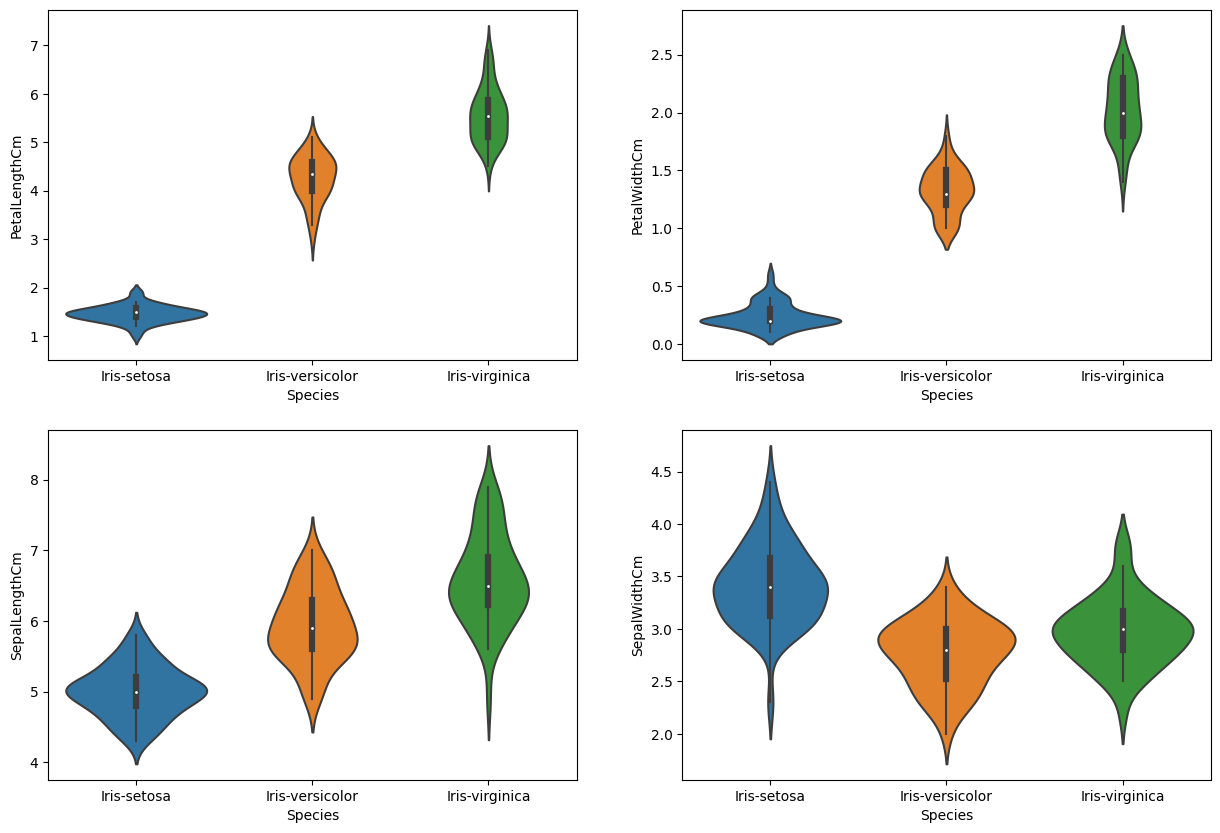

In [10]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)

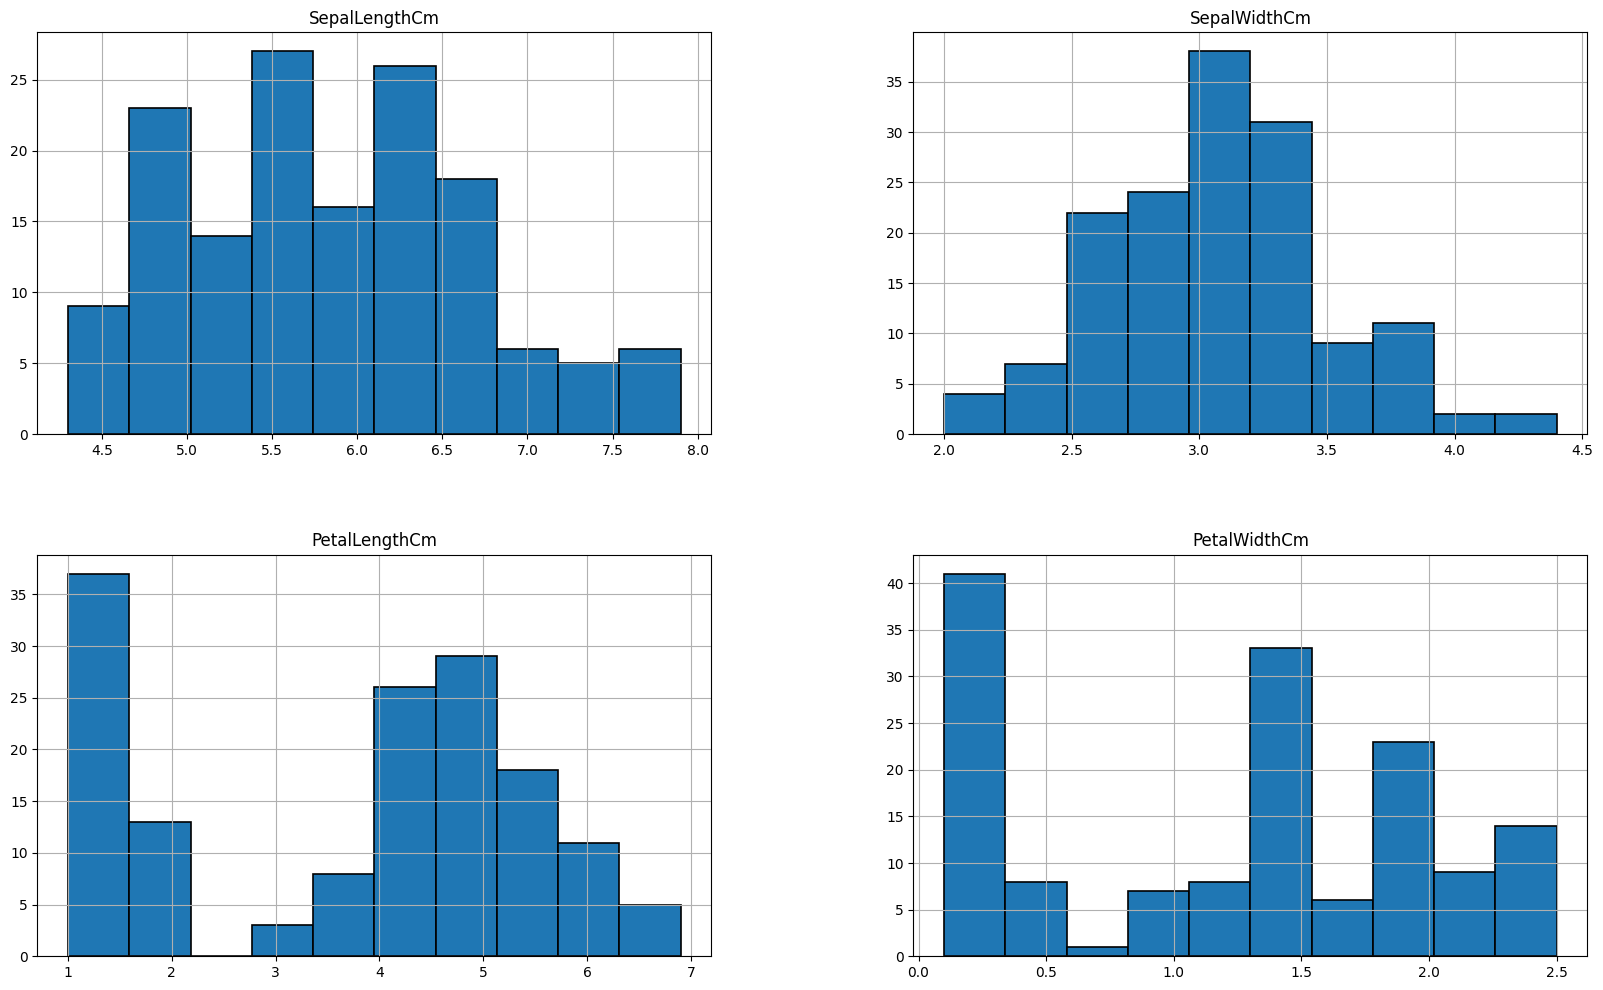

In [25]:
iris.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

C:\Users\M SRI HARI\AppData\Local\Temp\ipykernel_368\326525258.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris_corr = iris.corr()


[Text(1, 0.5, 'SepalWidthCm'),
 Text(1, 1.5, 'SepalLengthCm'),
 Text(1, 2.5, 'Id'),
 Text(1, 3.5, 'PetalLengthCm'),
 Text(1, 4.5, 'PetalWidthCm')]

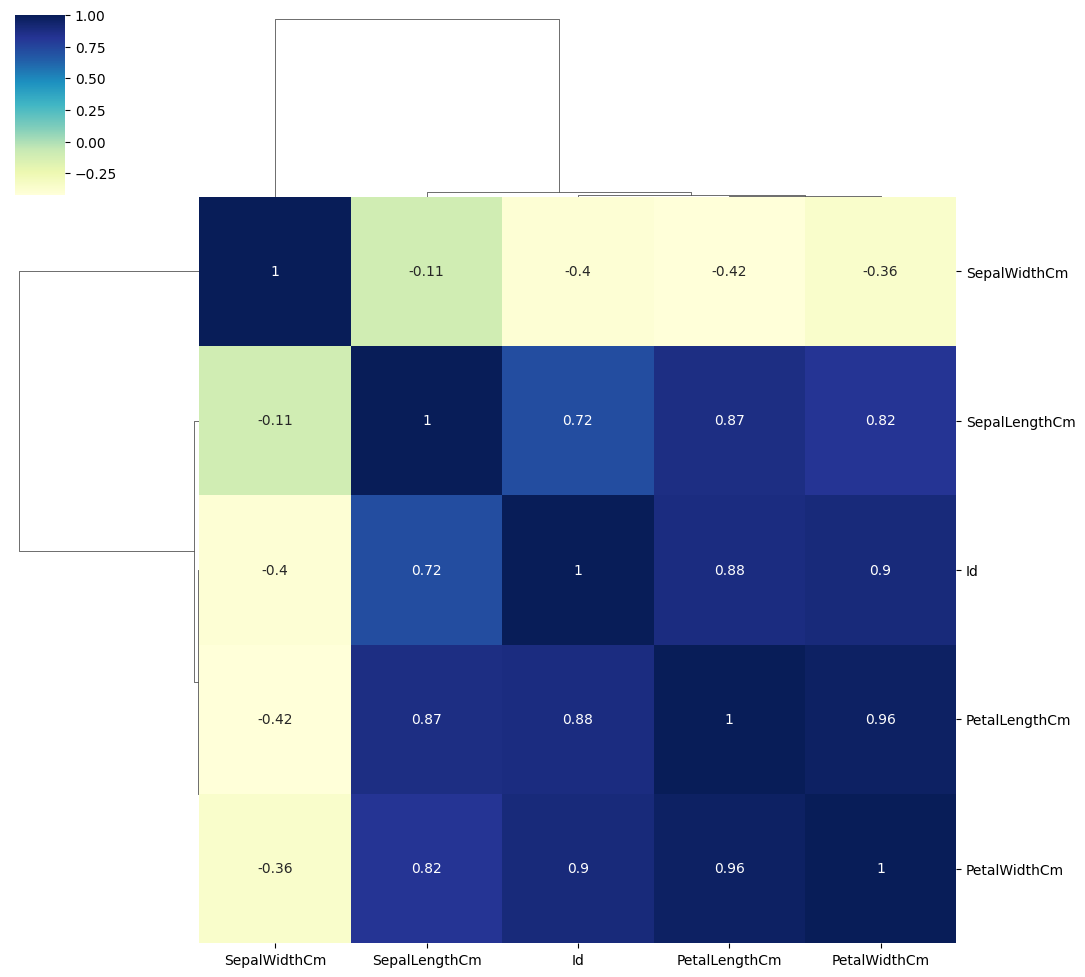

In [8]:
iris_corr = iris.corr()

plot_corr = sns.clustermap(data = iris_corr,
                           metric="correlation",
                           annot=True,
                           cmap="YlGnBu"
                           )

plot_corr.ax_heatmap.set_yticklabels(plot_corr.ax_heatmap.get_yticklabels(),
                                     rotation=0)

In [26]:
X=iris.iloc[:,:4]
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
Y=iris.iloc[:,-1]
Y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [28]:
X = preprocessing.StandardScaler().fit_transform(X)
X[0:4] #normalizing the data

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673]])

In [29]:
#train and split Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
Y_test.shape

(45,)

In [30]:
from sklearn import metrics
from sklearn.metrics import  accuracy_score, roc_auc_score

In [31]:
k=45
mean_acc=np.zeros((k-1))
#train and predict
for n in range(1,k):
    model=KNeighborsClassifier(n_neighbors=n).fit(X_train, Y_train)
    prediction=model.predict(X_test)
    mean_acc[n-1]=accuracy_score(prediction,Y_test)

print(mean_acc)

print("The best accuracy was with", mean_acc.max()*100,"% with k=", mean_acc.argmax()+1)

[0.95555556 0.95555556 0.97777778 0.95555556 0.95555556 0.97777778
 0.97777778 0.97777778 0.95555556 0.95555556 0.95555556 0.95555556
 0.95555556 0.95555556 0.95555556 0.95555556 0.93333333 0.93333333
 0.93333333 0.95555556 0.91111111 0.93333333 0.91111111 0.93333333
 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333
 0.91111111 0.93333333 0.93333333 0.93333333 0.93333333 0.91111111
 0.88888889 0.91111111 0.91111111 0.91111111 0.91111111 0.91111111
 0.88888889 0.86666667]
The best accuracy was with 97.77777777777777 % with k= 3


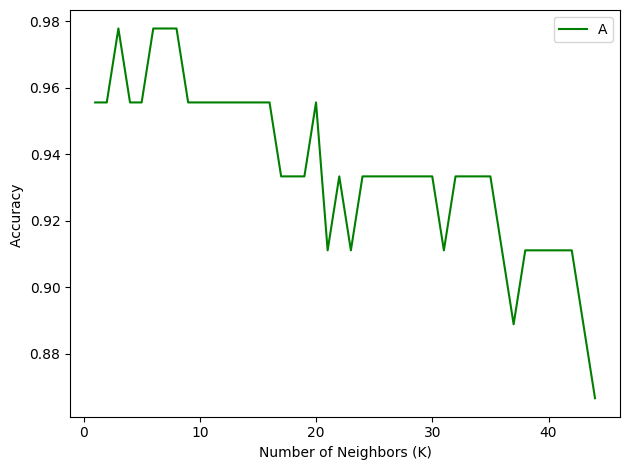

In [32]:
plt.plot(range(1,k),mean_acc,'g')
plt.legend(('Accuracy '))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [33]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)
y_predict1=model.predict(X_test)
acc=accuracy_score(Y_test,y_predict1)
acc

0.9777777777777777

In [34]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test.values,y_predict1)
cm

array([[14,  0,  0],
       [ 0, 18,  0],
       [ 0,  1, 12]], dtype=int64)

In [35]:
cm1=pd.DataFrame(data=cm,index=['setosa','versicolor','virginica'],columns=['setosa','versicolor','virginica'])
cm1

,setosa,versicolor,virginica
setosa,14,0,0
versicolor,0,18,0
virginica,0,1,12


In [36]:
prediction_output=pd.DataFrame(data=[Y_test.values,y_predict1],index=['y_test','y_predict1'])
prediction_output.transpose()

,y_test,y_predict1
0,Iris-setosa,Iris-setosa
1,Iris-versicolor,Iris-versicolor
2,Iris-versicolor,Iris-versicolor
3,Iris-setosa,Iris-setosa
4,Iris-virginica,Iris-virginica
5,Iris-versicolor,Iris-versicolor
6,Iris-virginica,Iris-virginica
7,Iris-setosa,Iris-setosa
8,Iris-setosa,Iris-setosa
9,Iris-virginica,Iris-virginica


In [37]:
prediction_output.iloc[0,:].value_counts()

Iris-versicolor    18
Iris-setosa        14
Iris-virginica     13
Name: y_test, dtype: int64

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
model = LogisticRegression()
model.fit(X_train,Y_train)
y_predict1=model.predict(X_test)
acc=accuracy_score(Y_test,y_predict1)
print("The accuracy of the Logistic Regression is",acc*100,"%")

The accuracy of the Logistic Regression is 95.55555555555556 %


In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)
y_predict1=model.predict(X_test)
acc=accuracy_score(Y_test,y_predict1)
print("The accuracy of the Decision Tree Classifier is",acc*100,"%")

The accuracy of the Decision Tree Classifier is 95.55555555555556 %
